In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Cleaning train.csv

In [2]:

df1=pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv")
df1.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [3]:
df1.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

age


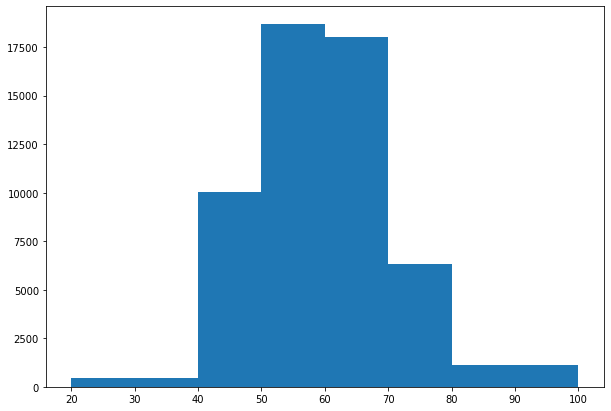

In [4]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df1['age'], bins = [20, 40, 50, 60, 70, 80, 100])
 
# Show plot
plt.show()

In [5]:
df1['age'].fillna(value= df1['age'].mean(), axis=0, inplace=True)

In [6]:
df1['age'].isnull().sum()

0

<AxesSubplot:>

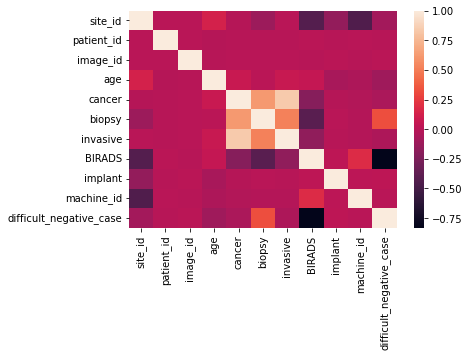

In [7]:
sns.heatmap(df1.corr())

birads


In [8]:
df2=df1['BIRADS'].interpolate(method ='linear', limit_direction ='backward', inplace=False)


In [9]:
df2.isnull().sum()

0

In [10]:
df1['BIRADS'].corr(df1['machine_id'])

0.18135154400876044

In [11]:
df2=pd.DataFrame(data=df2)
df2['machine_id']=df1['machine_id']
df2.corr()


,BIRADS,machine_id
BIRADS,1.000000,0.162716
machine_id,0.162716,1.000000


From above code, BIRADS has been filled using interpolate and the correlation has dropped slightly

Implementing Birads

In [12]:
df1['BIRADS'].interpolate(method ='linear', limit_direction ='backward', inplace=True)

Density

In [13]:
df1.corr()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id,difficult_negative_case
site_id,1.000000,-0.001236,-0.000508,0.128112,-0.009975,-0.121886,-0.002603,-0.207858,-0.153870,-0.446908,-0.090292
patient_id,-0.001236,1.000000,0.001124,-0.011808,-0.003253,-0.005848,-0.003762,0.010012,-0.004338,-0.002665,-0.004221
image_id,-0.000508,0.001124,1.000000,-0.007482,0.000223,0.001518,0.002657,0.000696,0.004602,-0.006546,0.009850
age,0.128112,-0.011808,-0.007482,1.000000,0.075155,0.010167,0.068674,0.046076,-0.069599,-0.050258,-0.104178
cancer,-0.009975,-0.003253,0.000223,0.075155,1.000000,0.613872,0.837815,-0.112389,-0.014311,-0.024888,-0.059541
biopsy,-0.121886,-0.005848,0.001518,0.010167,0.613872,1.000000,0.514311,-0.232847,-0.002569,-0.017580,0.323064
invasive,-0.002603,-0.003762,0.002657,0.068674,0.837815,0.514311,1.000000,-0.091098,-0.008443,-0.018867,-0.049884
BIRADS,-0.207858,0.010012,0.000696,0.046076,-0.112389,-0.232847,-0.091098,1.000000,0.031817,0.162716,-0.471137
implant,-0.153870,-0.004338,0.004602,-0.069599,-0.014311,-0.002569,-0.008443,0.031817,1.000000,0.018106,0.021065
machine_id,-0.446908,-0.002665,-0.006546,-0.050258,-0.024888,-0.017580,-0.018867,0.162716,0.018106,1.000000,0.000682


converting density's (ABCD) to (0,1,2,3)

In [15]:
df1.density.unique()

array([nan, 'C', 'D', 'B', 'A'], dtype=object)

In [22]:
df1['density']=df1['density'].replace([np.nan,'A', 'B', 'C','D'], [int(0),int(1),int(2),int(3),int(4)])
df1.density.unique()


array([0., 3., 4., 2., 1.])

In [25]:
count = (df1['density'] == 0).sum()
print(count)

25236


In [26]:
df1.corr()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
site_id,1.000000,-0.001236,-0.000508,0.128112,-0.009975,-0.121886,-0.002603,-0.207858,-0.153870,-0.908325,-0.446908,-0.090292
patient_id,-0.001236,1.000000,0.001124,-0.011808,-0.003253,-0.005848,-0.003762,0.010012,-0.004338,0.002932,-0.002665,-0.004221
image_id,-0.000508,0.001124,1.000000,-0.007482,0.000223,0.001518,0.002657,0.000696,0.004602,0.001018,-0.006546,0.009850
age,0.128112,-0.011808,-0.007482,1.000000,0.075155,0.010167,0.068674,0.046076,-0.069599,-0.200180,-0.050258,-0.104178
cancer,-0.009975,-0.003253,0.000223,0.075155,1.000000,0.613872,0.837815,-0.112389,-0.014311,0.009344,-0.024888,-0.059541
biopsy,-0.121886,-0.005848,0.001518,0.010167,0.613872,1.000000,0.514311,-0.232847,-0.002569,0.119362,-0.017580,0.323064
invasive,-0.002603,-0.003762,0.002657,0.068674,0.837815,0.514311,1.000000,-0.091098,-0.008443,0.002855,-0.018867,-0.049884
BIRADS,-0.207858,0.010012,0.000696,0.046076,-0.112389,-0.232847,-0.091098,1.000000,0.031817,0.167766,0.162716,-0.471137
implant,-0.153870,-0.004338,0.004602,-0.069599,-0.014311,-0.002569,-0.008443,0.031817,1.000000,0.162301,0.018106,0.021065
density,-0.908325,0.002932,0.001018,-0.200180,0.009344,0.119362,0.002855,0.167766,0.162301,1.000000,0.413300,0.101707


In [38]:
print("whole: ", df1.age.unique())
print("with den: ", df1[df1['density']!=0]['age'].unique())
print("with den: ", df1[df1['density']!=0]['density'].unique())
df1_1 = df1[df1['density']!=0]
df1_1.groupby(by = ['density']).count()

whole:  [61.       55.       75.       60.       51.       62.       52.
 67.       53.       38.       44.       40.       57.       56.
 71.       58.       46.       76.       68.       69.       54.
 59.       64.       50.       73.       70.       65.       45.
 63.       47.       66.       72.       82.       49.       77.
 85.       79.       78.       74.       41.       43.       48.
 83.       42.       89.       80.       86.       58.543928 84.
 39.       81.       36.       88.       37.       28.       87.
 32.       35.       34.       26.       30.       31.       33.
 29.      ]
with den:  [60.       51.       52.       38.       44.       40.       71.
 58.       76.       55.       61.       64.       50.       70.
 56.       65.       63.       47.       62.       54.       69.
 77.       85.       57.       78.       74.       72.       49.
 41.       45.       43.       46.       53.       67.       59.
 48.       83.       42.       89.       73.       68.     

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,machine_id,difficult_negative_case
density,,,,,,,,,,,,,
1.0,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105
2.0,12651,12651,12651,12651,12651,12651,12651,12651,12651,12651,12651,12651,12651
3.0,12175,12175,12175,12175,12175,12175,12175,12175,12175,12175,12175,12175,12175
4.0,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539


In [36]:
df1_1

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
12,1,10038,1967300488,L,MLO,60.0,0,0,0,1.000000,0,3.0,216,False
13,1,10038,2142944869,L,CC,60.0,0,0,0,1.000000,0,3.0,216,False
14,1,10038,850559196,R,MLO,60.0,0,0,0,1.000000,0,3.0,216,False
15,1,10038,1350492010,R,CC,60.0,0,0,0,1.000000,0,3.0,216,False
16,1,10042,102733848,L,CC,51.0,0,0,0,1.000000,0,3.0,93,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.000000,0,3.0,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,0.666667,0,3.0,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,0.333333,0,3.0,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.000000,0,3.0,216,True


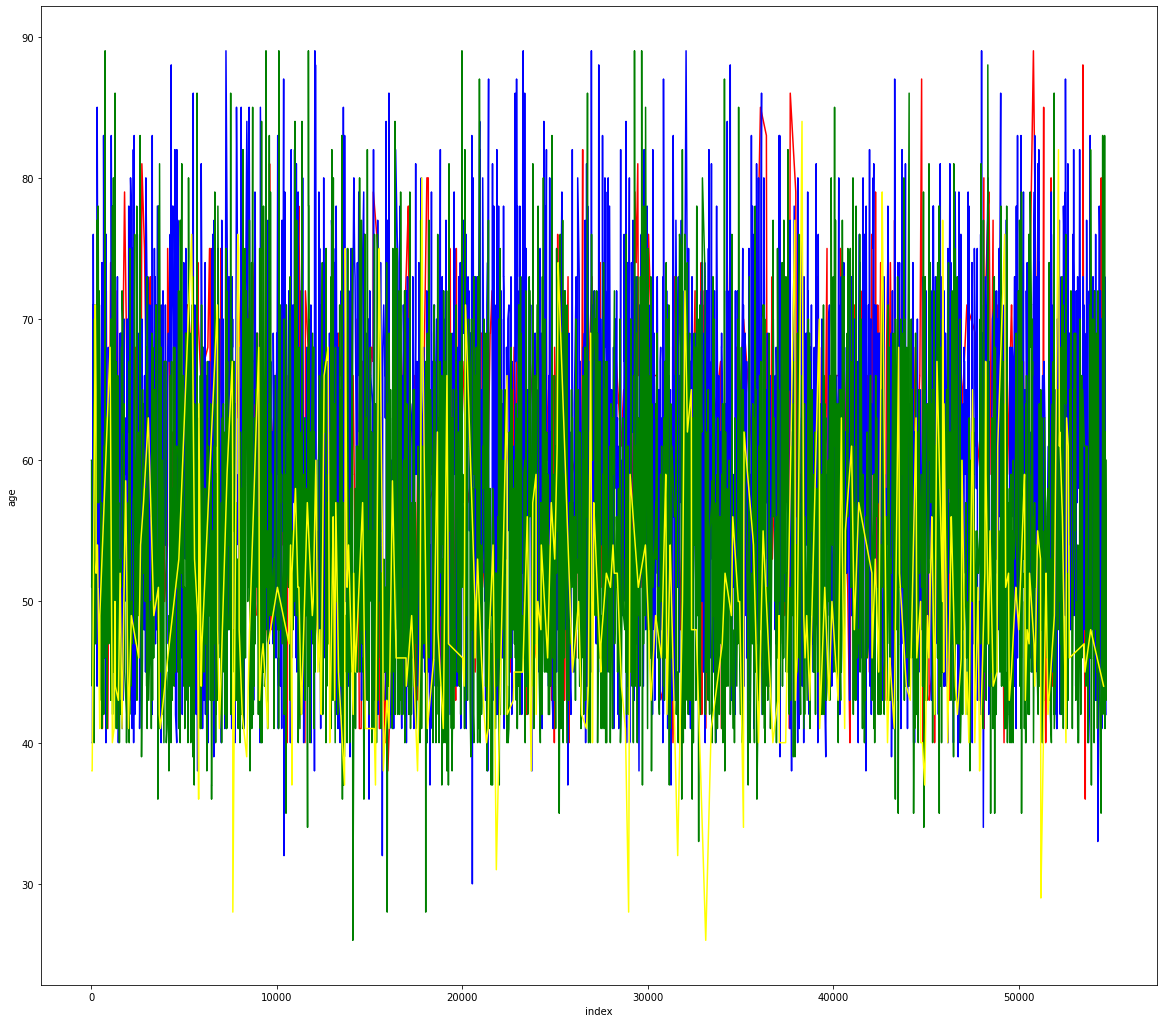

In [42]:
fig, ax = plt.subplots(figsize =(20, 18))
ax.set(xlabel = "index", ylabel = "age")
col_list = ['red', 'blue', 'green', 'yellow']
j = 0
for i in [1.0,2.0,3.0,4.0]:
    plt.plot(df1_1[df1_1['density'] == i].index, df1_1[df1_1['density'] == i].age, color = col_list[j])
    j = j+1

# ax.hist(df1['density']
#         , bins = [20, 40, 50, 60, 70, 80, 100]
#        )
 
# Show plot
# plt.show()